In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [2]:
# set the dimensions
N = 100
D = 2
K = 3

In [3]:
# set the initial weights
W = np.random.randn(D,K)
b = np.zeros(K)

In [4]:
print(W.shape)
print(b.shape)

(2, 3)
(3,)


In [5]:
print(W)
print()
print(b)

[[ 1.30300696  0.67358626 -1.28849036]
 [-0.43770045  0.13552017  0.0382872 ]]

[ 0.15947824  0.38399315 -1.74344171]


In [6]:
X, t = make_blobs(n_features=2, centers=3)

In [7]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [8]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

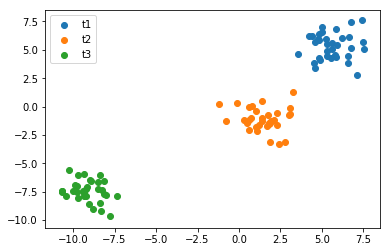

In [9]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [10]:
def Z(X, W, b):
#     return X.dot(W) + b
    return np.dot(X, W) + b

In [11]:
Z1 = Z(X, W, b)
Z1.shape

(100, 3)

In [12]:
def predict(Z_single):
    exp_Z = np.exp(Z_single)
    return np.argmax(exp_Z/(np.exp(Z_single).sum()))

In [13]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/(np.exp(Z).sum(axis=1).reshape((N,-1)))

In [14]:
y = soft(Z1)
y.shape

(100, 3)

In [15]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [16]:
def cost(t, y):
    return -t*np.log(y)

In [17]:
cost1 = cost(ohe(t), y)
cost1.shape

(100, 3)

In [18]:
def error(cost):
    return (cost.sum())/N

In [19]:
error1 = error(cost1)
error1

0.77717031546423687

In [30]:
(X.T).shape

(2, 100)

In [31]:
(y - ohe(t)).shape

(100, 3)

In [32]:
dw.shape

(2, 3)

In [20]:
lr = 0.001
print('initial error: {}'.format(error1))

for e in range(10000):
    
    Z1 = Z(X, W, b)
    y = soft(Z1)
    cost1 = cost(ohe(t), y)
    error1 = error(cost1)
    
    dw = np.dot(X.T,(y - ohe(t)))
    db = ((y - ohe(t)).sum(axis=0))/N
    
    W -= lr*dw
    b -= lr*db
    
    if e % 100 == 0:
        print('error:{}'.format(error1))

initial error: 0.7771703154642369
error:0.7771703154642369
error:0.07835081839095223
error:0.06914737104518072
error:0.06626235140474115
error:0.06492898143944979
error:0.06409845364136679
error:0.06348152636312779
error:0.06298198678859679
error:0.06255596883779911
error:0.06217956464934552
error:0.06183851504708294
error:0.06152379400606911
error:0.061229412543875775
error:0.060951233842984696
error:0.060686297317653876
error:0.06043241580501953
error:0.06018792664998334
error:0.059951533036390094
error:0.05972220006084346
error:0.05949908499414123
error:0.0592814894416358
error:0.05906882584704937
error:0.05886059357864932
error:0.05865636153171243
error:0.058455755234485283
error:0.05825844711362362
error:0.058064149007997085
error:0.057872606304853316
error:0.057683593263009134
error:0.05749690921700999
error:0.05731237544490125
error:0.05712983254376202
error:0.056949138200192866
error:0.05677016527330581
error:0.056592800129323335
error:0.05641694118229518
error:0.05624249760650

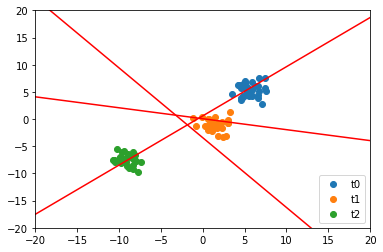

In [21]:
ex = np.linspace(-30, 30, 100)
ey1 = -(W[0,0]*ex + b[0])/W[1,0]
ey2 = -(W[0,1]*ex + b[1])/W[1,1]
ey3 = -(W[0,2]*ex + b[2])/W[1,2]

plt.axes(xlim=(-20,20), ylim=(-20,20))
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't0')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't1')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't2')

plt.plot(ex, ey1, color='r')
plt.plot(ex, ey2, color='r')
plt.plot(ex, ey3, color='r')

plt.legend()
plt.show()

In [22]:
y[:5]

array([[  4.53644806e-09,   7.85011939e-06,   9.99992145e-01],
       [  9.99965035e-01,   3.49639384e-05,   1.55996807e-09],
       [  6.56698446e-03,   9.93154107e-01,   2.78908615e-04],
       [  5.38947826e-09,   6.06850925e-04,   9.99393144e-01],
       [  3.76199431e-11,   2.73408503e-05,   9.99972659e-01]])

In [23]:
ohe(t)[:5]

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0.,  1.]])

In [24]:
test = Z([-10,5],W,b)

In [25]:
predict(test)

0

In [26]:
np.argmax(y, axis=1)

array([2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 0, 2, 0])

In [27]:
np.argmax(ohe(t), axis=1)

array([2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 0, 2, 0, 2, 1, 2, 2, 0, 1, 1,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0,
       1, 1, 0, 1, 1, 1, 2, 0])

In [28]:
(np.argmax(y, axis=1)==np.argmax(ohe(t), axis=1)).sum()

97

In [29]:
np.argmax(y, axis=1)-np.argmax(ohe(t), axis=1)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0])